In [70]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import stat
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
import tensorflow as tf

In [9]:
full_df = pd.read_csv('weather_train.csv')

In [10]:
full_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [11]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [13]:
full_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [19]:
full_df_piv = pd.pivot_table(full_df, index=full_df['timestamp'], columns='site_id')

In [20]:
full_df_piv.head()

air_temperature                                        \
site_id                          0    1     2     3    4    5     6    7    
timestamp                                                                   
2016-01-01 00:00:00            25.0  3.8  15.6  10.0  NaN  NaN   NaN -1.8   
2016-01-01 01:00:00            24.4  3.7  13.9   9.4  9.4  5.0  10.0 -1.7   
2016-01-01 02:00:00            22.8  2.6  13.3   8.9  8.3  3.0  10.0 -2.7   
2016-01-01 03:00:00            21.1  2.0  12.2   7.8  7.8  4.0   9.4 -2.3   
2016-01-01 04:00:00            20.0  2.3  11.7   7.8  5.0  4.0   7.8 -2.6   

                                 ... wind_speed                                \
site_id                8     9   ...         6    7    8    9    10   11   12   
timestamp                        ...                                            
2016-01-01 00:00:00  25.0   NaN  ...        NaN  1.5  0.0  NaN  NaN  1.5  5.0   
2016-01-01 01:00:00  24.4  10.0  ...        0.0  1.0  1.5  3.1  0.0  1.0  3.0   
2016-01-01 02:00:00  22.8  10.0  ...        3.6  0.5  0.0  2.1  0.0  0.5  3.0   
2016-01-01 03:00:00  21.1  10.0  ...        3.1  1.5  0.0  3.6  2.6  1.5  4.0   
2016-01-01 04:00:00  20.0  10.0  ...        2.1  2.1  2.6  3.6  1.5  2.1  3.0   

                                    
site_id               13   14   15  
timestamp                           
2016-01-01 00:00:00  4.1  NaN  NaN  
2016-01-01 01:00:00  4.1  2.6  4.1  
2016-01-01 02:00:00  3.1  2.6  2.6  
2016-01-01 03:00:00  4.1  1.5  2.1  
2016-01-01 04:00:00  4.1  3.1  NaN  

[5 rows x 106 columns]

In [21]:
full_df_piv

air_temperature                                          \
site_id                          0    1     2     3     4    5     6     7    
timestamp                                                                     
2016-01-01 00:00:00            25.0  3.8  15.6  10.0   NaN  NaN   NaN  -1.8   
2016-01-01 01:00:00            24.4  3.7  13.9   9.4   9.4  5.0  10.0  -1.7   
2016-01-01 02:00:00            22.8  2.6  13.3   8.9   8.3  3.0  10.0  -2.7   
2016-01-01 03:00:00            21.1  2.0  12.2   7.8   7.8  4.0   9.4  -2.3   
2016-01-01 04:00:00            20.0  2.3  11.7   7.8   5.0  4.0   7.8  -2.6   
...                             ...  ...   ...   ...   ...  ...   ...   ...   
2016-12-31 19:00:00            22.8  8.1  15.0   9.4  12.8  9.0   8.9 -10.3   
2016-12-31 20:00:00            23.3  7.2  16.1   8.9  11.1  8.0   8.9  -9.9   
2016-12-31 21:00:00            23.3  6.9  16.7   8.9  11.1  8.0   8.9  -9.9   
2016-12-31 22:00:00            22.8  6.9  16.7   8.9  11.7  8.0   7.8  -9.8   
2016-12-31 23:00:00            20.6  7.5  16.7   8.9  12.8  8.0   7.2  -9.6   

                                 ... wind_speed                                \
site_id                8     9   ...         6    7    8    9    10   11   12   
timestamp                        ...                                            
2016-01-01 00:00:00  25.0   NaN  ...        NaN  1.5  0.0  NaN  NaN  1.5  5.0   
2016-01-01 01:00:00  24.4  10.0  ...        0.0  1.0  1.5  3.1  0.0  1.0  3.0   
2016-01-01 02:00:00  22.8  10.0  ...        3.6  0.5  0.0  2.1  0.0  0.5  3.0   
2016-01-01 03:00:00  21.1  10.0  ...        3.1  1.5  0.0  3.6  2.6  1.5  4.0   
2016-01-01 04:00:00  20.0  10.0  ...        2.1  2.1  2.6  3.6  1.5  2.1  3.0   
...                   ...   ...  ...        ...  ...  ...  ...  ...  ...  ...   
2016-12-31 19:00:00  22.8  21.7  ...        6.7  5.1  5.7  2.6  1.5  5.1  9.0   
2016-12-31 20:00:00  23.3  21.7  ...        9.3  5.7  4.1  3.1  2.1  5.7  9.0   
2016-12-31 21:00:00  23.3  23.9  ...        6.7  5.1  4.1  3.6  0.0  5.1  8.0   
2016-12-31 22:00:00  22.8  25.0  ...        7.7  5.1  3.1  3.1  2.1  5.1  7.0   
2016-12-31 23:00:00  20.6  24.4  ...        6.7  4.1  0.0  1.5  1.5  4.1  6.0   

                                    
site_id               13   14   15  
timestamp                           
2016-01-01 00:00:00  4.1  NaN  NaN  
2016-01-01 01:00:00  4.1  2.6  4.1  
2016-01-01 02:00:00  3.1  2.6  2.6  
2016-01-01 03:00:00  4.1  1.5  2.1  
2016-01-01 04:00:00  4.1  3.1  NaN  
...                  ...  ...  ...  
2016-12-31 19:00:00  4.1  6.7  5.7  
2016-12-31 20:00:00  4.1  5.7  7.7  
2016-12-31 21:00:00  4.1  5.7  5.1  
2016-12-31 22:00:00  4.6  6.7  4.6  
2016-12-31 23:00:00  3.6  9.8  8.8  

[8784 rows x 106 columns]

In [33]:
mean_usage = full_df_piv.mean(axis = 0) 

In [41]:
#new = mean_usage.groupby(level = 'air_temperature').mean()

In [42]:
full_df_piv['air_temperature']

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,25.0,3.8,15.6,10.0,NaN,NaN,NaN,-1.8,25.0,NaN,NaN,-1.8,1.9,-8.3,NaN,NaN
2016-01-01 01:00:00,24.4,3.7,13.9,9.4,9.4,5.0,10.0,-1.7,24.4,10.0,-10.6,-1.7,1.6,-8.3,5.6,-1.0
2016-01-01 02:00:00,22.8,2.6,13.3,8.9,8.3,3.0,10.0,-2.7,22.8,10.0,-11.1,-2.7,0.7,-7.8,5.6,-1.0
2016-01-01 03:00:00,21.1,2.0,12.2,7.8,7.8,4.0,9.4,-2.3,21.1,10.0,-10.0,-2.3,0.8,-7.8,5.6,-1.0
2016-01-01 04:00:00,20.0,2.3,11.7,7.8,5.0,4.0,7.8,-2.6,20.0,10.0,-13.3,-2.6,2.9,-7.2,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,22.8,8.1,15.0,9.4,12.8,9.0,8.9,-10.3,22.8,21.7,-4.4,-10.3,9.7,-3.3,6.7,3.0
2016-12-31 20:00:00,23.3,7.2,16.1,8.9,11.1,8.0,8.9,-9.9,23.3,21.7,-4.4,-9.9,9.7,-3.9,5.6,2.8
2016-12-31 21:00:00,23.3,6.9,16.7,8.9,11.1,8.0,8.9,-9.9,23.3,23.9,-4.4,-9.9,8.6,-4.4,5.6,2.8


In [43]:
full_df_piv['cloud_coverage']

site_id,0,1,2,3,4,5,6,8,9,10,12,13,14,15
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,6.0,NaN,6.0,8.0,NaN,NaN,NaN,6.0,NaN,NaN,4.0,8.0,NaN,NaN
2016-01-01 01:00:00,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,4.0,NaN,0.0,NaN
2016-01-01 02:00:00,2.0,0.0,2.0,NaN,0.0,0.0,NaN,2.0,NaN,0.0,4.0,NaN,4.0,NaN
2016-01-01 03:00:00,2.0,0.0,0.0,8.0,0.0,0.0,NaN,2.0,NaN,0.0,4.0,NaN,NaN,NaN
2016-01-01 04:00:00,2.0,0.0,2.0,NaN,0.0,NaN,2.0,2.0,NaN,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN
2016-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,8.0,0.0,4.0,2.0
2016-12-31 21:00:00,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,4.0,NaN,8.0,0.0,NaN,NaN


In [44]:
full_df_piv['dew_temperature']

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,20.0,2.4,-5.6,2.2,NaN,NaN,NaN,-3.2,20.0,NaN,NaN,-3.2,-1.2,-12.2,NaN,NaN
2016-01-01 01:00:00,21.1,2.4,-5.6,2.8,-2.2,2.0,8.9,-2.8,21.1,3.9,-13.9,-2.8,-1.5,-11.7,-0.6,-1.0
2016-01-01 02:00:00,21.1,1.9,-5.6,2.2,-2.8,1.0,8.3,-3.3,21.1,3.9,-13.9,-3.3,-1.8,-11.1,-0.6,-1.0
2016-01-01 03:00:00,20.6,1.2,-6.1,1.1,-2.8,3.0,4.4,-3.2,20.6,3.9,-15.0,-3.2,-2.1,-11.1,-1.1,-2.0
2016-01-01 04:00:00,20.0,1.8,-6.7,0.6,-0.6,3.0,3.9,-3.3,20.0,3.9,-15.6,-3.3,-1.6,-10.6,-2.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,10.0,6.5,11.1,-6.7,3.3,7.0,-6.7,-11.9,10.0,15.6,-7.2,-11.9,5.4,-10.0,-8.3,-8.0
2016-12-31 20:00:00,8.9,6.1,10.0,-6.1,3.9,7.0,-7.2,-11.5,8.9,15.6,-7.8,-11.5,5.7,-10.6,-6.7,-8.9
2016-12-31 21:00:00,10.0,5.8,9.4,-6.1,3.3,7.0,-7.8,-11.5,10.0,16.1,-7.2,-11.5,6.8,-11.7,-6.7,-7.2


In [45]:
full_df_piv['precip_depth_1_hr']

site_id,0,2,3,4,6,7,8,9,10,11,13,14,15
timestamp,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,-1.0,0.0,0.0,0.0,0.0,NaN,-1.0,0.0,0.0,NaN,-1.0,0.0,NaN
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,-1.0,0.0,NaN
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,-1.0,0.0,NaN
2016-01-01 04:00:00,-1.0,0.0,0.0,0.0,0.0,NaN,-1.0,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
2016-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
2016-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN


In [46]:
full_df_piv['sea_level_pressure']

site_id,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1019.7,1020.9,1015.3,1021.1,NaN,NaN,1016.0,1019.7,NaN,NaN,1016.0,1016.2,1023.3,NaN,NaN
2016-01-01 01:00:00,1020.2,1021.6,1015.6,1021.5,1021.4,1019.8,1016.1,1020.2,1027.7,1036.7,1016.1,1016.3,1023.3,1019.3,NaN
2016-01-01 02:00:00,1020.2,1021.9,1016.0,1021.7,1021.6,NaN,1015.8,1020.2,1028.0,1036.9,1015.8,1016.5,1022.9,1019.4,NaN
2016-01-01 03:00:00,1020.1,1022.3,1016.6,1021.7,1021.7,1020.5,1015.4,1020.1,1028.9,1036.9,1015.4,1016.4,1022.7,1019.4,NaN
2016-01-01 04:00:00,1020.0,1022.7,1017.0,1021.8,1021.8,1020.6,1015.1,1020.0,1029.1,1037.8,1015.1,1016.2,1022.8,1019.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1021.7,1027.5,1012.4,1016.7,1015.0,1016.8,1007.2,1021.7,1009.7,1019.7,1007.2,1021.0,1009.1,1015.8,NaN
2016-12-31 20:00:00,1021.0,1026.9,1011.7,1016.3,1014.7,1016.4,1006.3,1021.0,1008.7,1018.8,1006.3,1020.2,1009.1,1015.3,1007.4
2016-12-31 21:00:00,1021.1,1026.2,1011.2,1015.4,1014.2,1016.3,1005.8,1021.1,1008.0,1017.9,1005.8,1019.5,1009.4,1014.9,1007.5


In [47]:
full_df_piv['wind_direction']

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,240.0,270.0,350.0,NaN,NaN,NaN,280.0,0.0,NaN,NaN,280.0,200.0,250.0,NaN,NaN
2016-01-01 01:00:00,70.0,230.0,270.0,350.0,360.0,260.0,0.0,260.0,70.0,20.0,0.0,260.0,190.0,240.0,300.0,330.0
2016-01-01 02:00:00,0.0,0.0,270.0,10.0,0.0,NaN,50.0,350.0,0.0,NaN,0.0,350.0,170.0,240.0,300.0,330.0
2016-01-01 03:00:00,0.0,170.0,280.0,350.0,90.0,160.0,30.0,280.0,0.0,30.0,280.0,280.0,170.0,250.0,NaN,340.0
2016-01-01 04:00:00,250.0,110.0,270.0,340.0,0.0,110.0,50.0,310.0,250.0,10.0,230.0,310.0,130.0,270.0,290.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,140.0,220.0,210.0,200.0,50.0,220.0,200.0,70.0,140.0,210.0,60.0,70.0,230.0,270.0,200.0,180.0
2016-12-31 20:00:00,170.0,220.0,260.0,200.0,50.0,260.0,200.0,70.0,170.0,NaN,170.0,70.0,230.0,290.0,200.0,180.0
2016-12-31 21:00:00,150.0,220.0,240.0,190.0,50.0,230.0,210.0,70.0,150.0,230.0,0.0,70.0,230.0,240.0,190.0,180.0


In [48]:
full_df_piv['wind_speed']

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,3.1,3.6,4.1,NaN,NaN,NaN,1.5,0.0,NaN,NaN,1.5,5.0,4.1,NaN,NaN
2016-01-01 01:00:00,1.5,2.6,4.1,6.2,3.1,2.6,0.0,1.0,1.5,3.1,0.0,1.0,3.0,4.1,2.6,4.1
2016-01-01 02:00:00,0.0,0.0,3.1,4.6,0.0,1.5,3.6,0.5,0.0,2.1,0.0,0.5,3.0,3.1,2.6,2.6
2016-01-01 03:00:00,0.0,1.5,3.1,7.7,1.5,2.6,3.1,1.5,0.0,3.6,2.6,1.5,4.0,4.1,1.5,2.1
2016-01-01 04:00:00,2.6,1.5,3.1,4.1,0.0,4.1,2.1,2.1,2.6,3.6,1.5,2.1,3.0,4.1,3.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,5.7,3.6,3.6,11.8,3.1,3.1,6.7,5.1,5.7,2.6,1.5,5.1,9.0,4.1,6.7,5.7
2016-12-31 20:00:00,4.1,4.1,3.6,8.2,4.1,4.1,9.3,5.7,4.1,3.1,2.1,5.7,9.0,4.1,5.7,7.7
2016-12-31 21:00:00,4.1,4.6,4.6,7.7,5.1,3.6,6.7,5.1,4.1,3.6,0.0,5.1,8.0,4.1,5.7,5.1


In [49]:
# remove site id , 1, 11 and 5

In [100]:
ws = full_df_piv['wind_speed'].mean().to_frame(name='wind_speed_mean')
wd = full_df_piv['wind_direction'].mean().to_frame(name='wind_direction_mean')
sp = full_df_piv['sea_level_pressure'].mean().to_frame(name='sea_pressure_mean')
ed = full_df_piv['precip_depth_1_hr'].mean().to_frame(name='precip_depth_mean')
dt = full_df_piv['dew_temperature'].mean().to_frame(name='dew_temp_mean')
cc = full_df_piv['cloud_coverage'].mean().to_frame(name='cloud_cover_mean')
at = full_df_piv['air_temperature'].mean().to_frame(name='ambient_temp_mean')

In [103]:
merged = pd.join([ws, wd, dt, at])


In [104]:
merged

,precip_depth_mean,wind_speed_mean,wind_direction_mean,dew_temp_mean,ambient_temp_mean
site_id,,,,,
0,1.382557,3.375114,156.494024,16.817880,22.836021
2,0.157738,2.932764,152.777100,4.069506,24.940321
3,0.691868,3.910893,185.063174,8.126214,15.520579
4,0.248594,3.858226,207.864715,9.894750,15.236366
6,0.797768,2.197758,131.618143,7.320691,15.141678
7,11.350205,3.445565,208.931739,1.905913,7.888867
8,1.382557,3.375114,156.494024,16.817880,22.836021
9,0.755158,2.083658,116.648987,14.613302,21.367499
10,0.457453,3.158677,179.879971,0.082273,11.644679


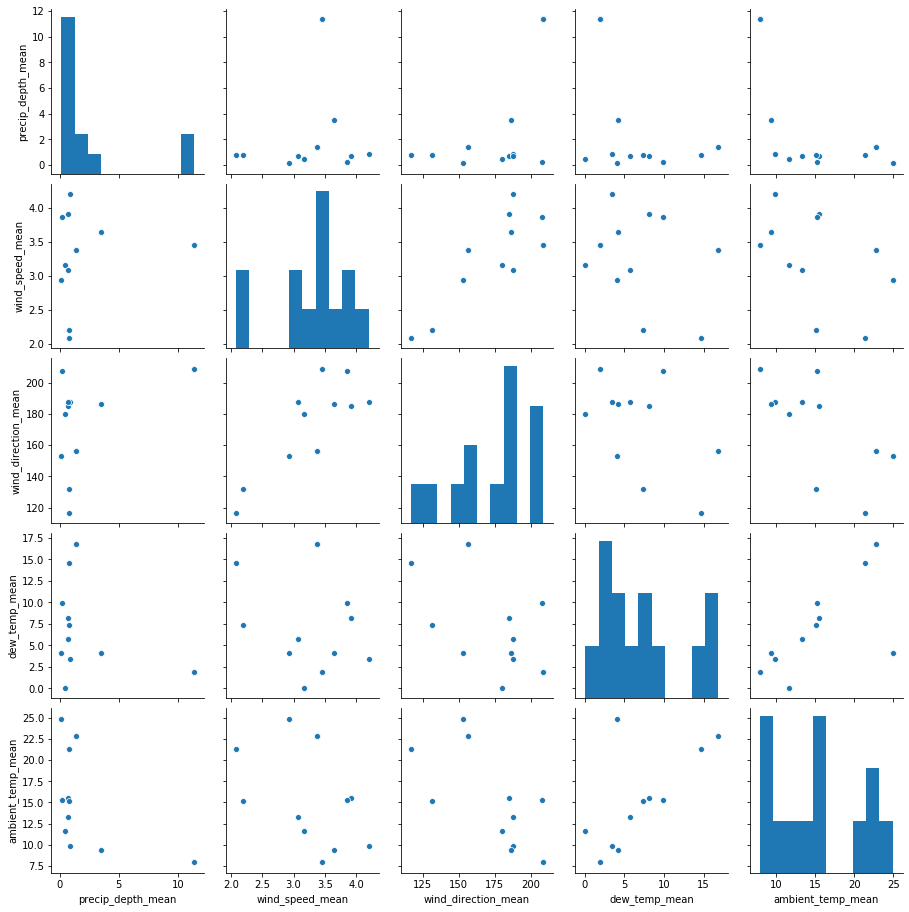

In [105]:
sns.pairplot(merged)